This notebook walks through the group level analyses for Developmental differences in learning from large losses study. Details of the behavioral analyses can be found [here](https://zenkavi.github.io/DevStudy_Analyses/output/reports/DevStudy_MG_Behavior.nb.html).

Import packages

In [1]:
import glob
import nibabel as nib
from nilearn.image import concat_imgs
import numpy as np
import os
import pandas as pd
import re
import sys
sys.path.append(os.environ['SERVER_SCRIPTS'])
from utils.mni2vox import mni2vox
import warnings

Load plotting packages

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from nistats.reporting import plot_design_matrix, plot_contrast_matrix
from nilearn import plotting, image

%matplotlib inline

# Statistical tests

Level 3 script can be found [here](https://github.com/zenkavi/DevStudy_ServerScripts/blob/master/nistats/level_3/level_3.py)

## Model 1: Task regressors vs. baseline

Randomise cluster corrected p values

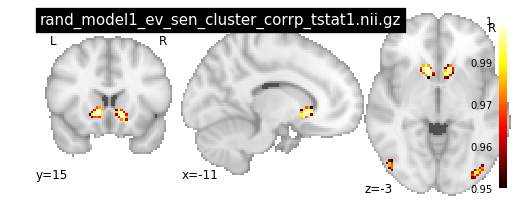

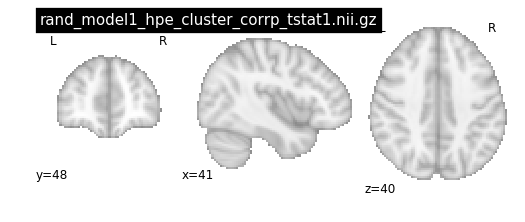

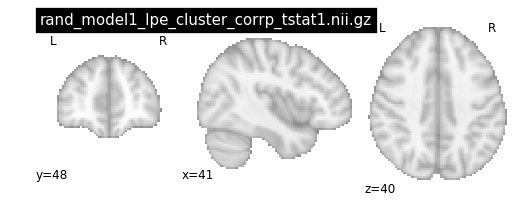

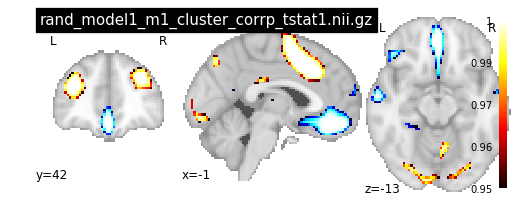

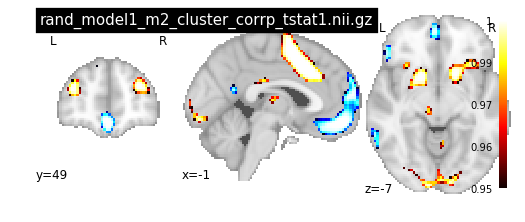

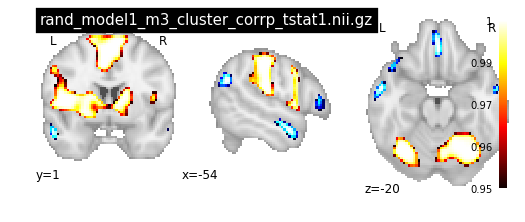

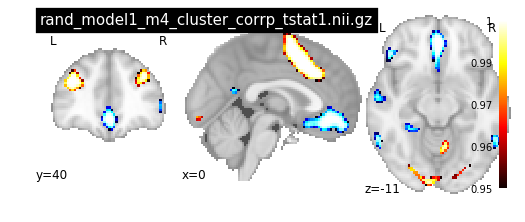

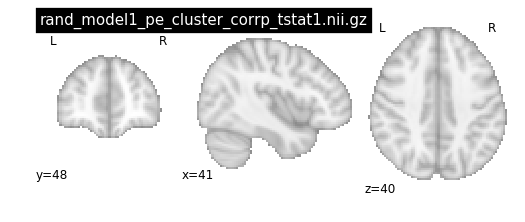

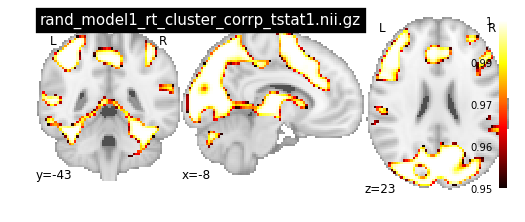

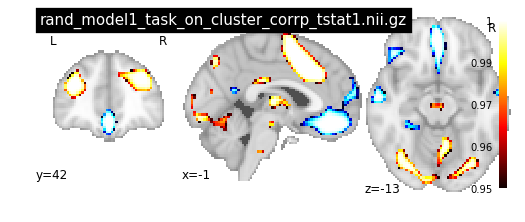

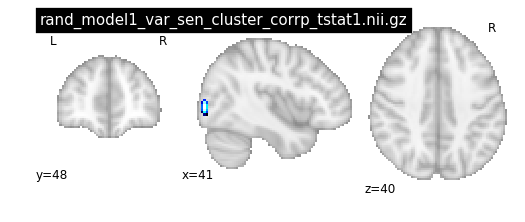

In [3]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model1/*/*corrp_tstat1*')
neg_t_corrected_p_paths = [x for x in all_paths if "neg" in x]
neg_t_corrected_p_paths.sort()
pos_t_corrected_p_paths = [x for x in all_paths if "neg" not in x]
pos_t_corrected_p_paths.sort()

for i in range(0, len(pos_t_corrected_p_paths)):
    #determine display coordinates
    if any(x in os.path.basename(pos_t_corrected_p_paths[i]) for x in ['m1', 'm2', 'm3', 'm4', 'task_on']):
        fig = plotting.plot_stat_map(image.smooth_img(neg_t_corrected_p_paths[i],5), colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    else:
        fig = plotting.plot_stat_map(image.smooth_img(pos_t_corrected_p_paths[i],5), colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(image.smooth_img(pos_t_corrected_p_paths[i],5), threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(image.smooth_img(neg_t_corrected_p_paths[i],5), threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

- For all subjects we find significantly higher activity that survives whole brain correction bilaterally in VStr in response to positive EV machines compared to negative EV machines. In contrast we do not find any difference when comparing the relationship between BOLD and the presentation of high or low variance machines.  
- The relationship between BOLD activity and convolved PE regressors separately for high and low variance machines does not survive whole brain correction compared to baseline in any region (worrying given prior literature)
- Activity during the presentation of all stimuli exhibits a task-positive pattern with decreased activity in a large mPFC cluster and increased activity in frontal pole, inferior frontal gyrus, insula, paracingulate gyrus/supplementary motor cortex, occipital pole. 

## Model 2: Task regressors for the three age groups

Randomise cluster corrected p values for F-test checking for difference in means across the three groups

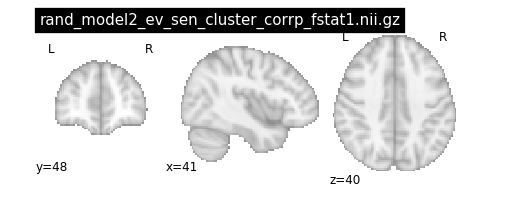

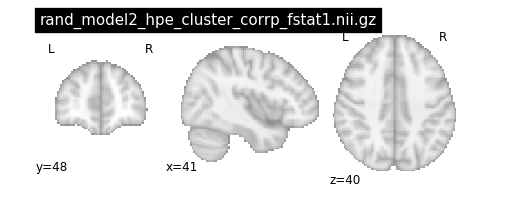

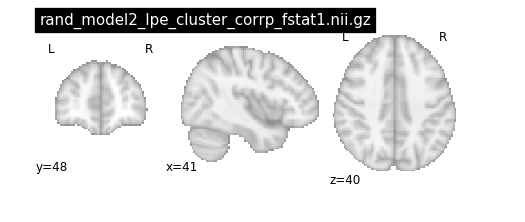

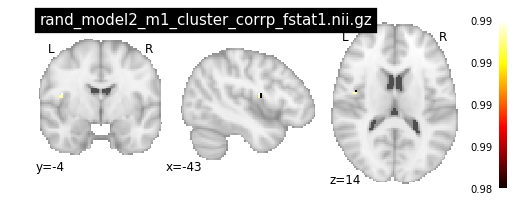

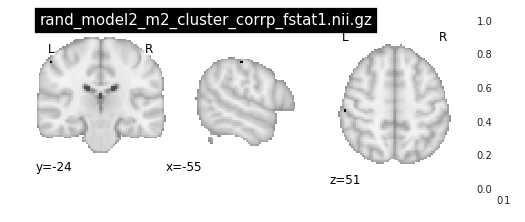

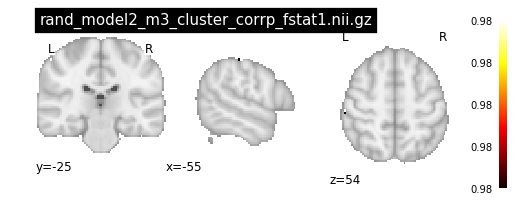

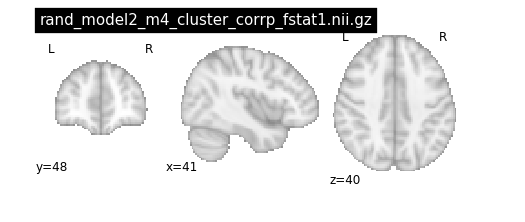

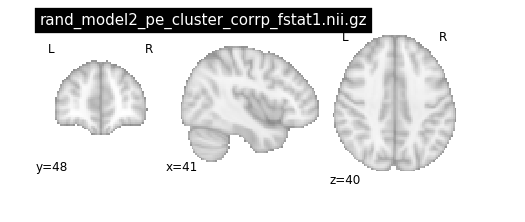

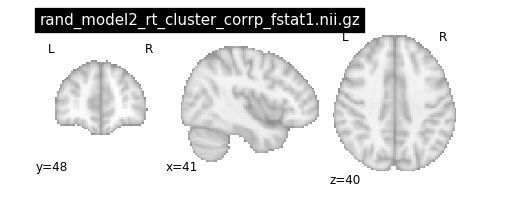

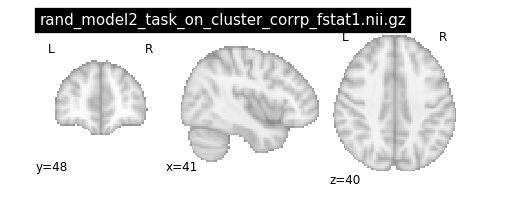

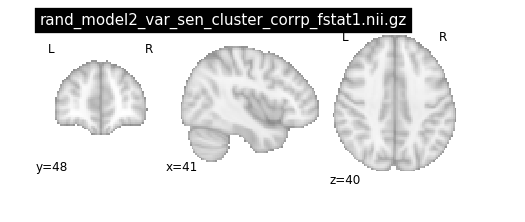

In [4]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model2/*/*fstat*')
f_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
f_corrected_p_paths.sort()
del all_paths

for i in range(0, len(f_corrected_p_paths)):
    fig = plotting.plot_stat_map(f_corrected_p_paths[i], colorbar=False, title=os.path.basename(f_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(f_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)

- We find an age group difference surviving whole brain correction in response to "bad" machines (i.e. those with high variance and negative expected value)  
- No other task related regressor shows differences between groups that relates to the behavioral group differences and survives correction.

To understand the directionationality of the age group difference following the presentation of "bad" machines we overlay uncorrected t-statistic maps for each age group denoting the group difference cluster in yellow. 

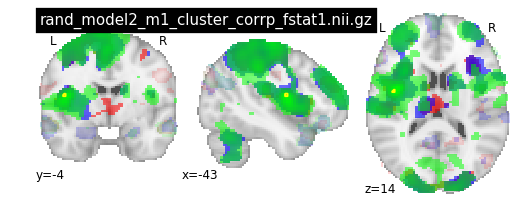

In [5]:
in_path = "/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model2"
reg = "m1"
f_corrected_p_path = os.path.join(in_path, reg, "rand_model2_m1_cluster_corrp_fstat1.nii.gz")
kid_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat1_cluster.nii.gz")
teen_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat2_cluster.nii.gz")
adult_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat3_cluster.nii.gz")

fig = plotting.plot_stat_map(f_corrected_p_path, colorbar=False, title=os.path.basename(f_corrected_p_path), threshold=0.95, draw_cross=False)
fig.add_contours(f_corrected_p_path, levels=[0.95], colors='yellow')
fig.add_overlay(kid_t_map, threshold=3, cmap=plotting.cm.red_transparent_full_alpha_range, colorbar=False)
fig.add_overlay(teen_t_map, threshold=3, cmap=plotting.cm.blue_transparent_full_alpha_range, colorbar=False)
fig.add_overlay(adult_t_map, threshold=3, cmap=plotting.cm.green_transparent_full_alpha_range, colorbar=False)


**The relationship between BOLD and the presentation of the 'bad' machine increases with age in the insula**

In [6]:
mni = [-43, -4, 14]
T = nib.load(kid_t_map).affine
kid_t = np.round(nib.load(kid_t_map).get_fdata()[mni2vox(mni, T)],2)
T = nib.load(teen_t_map).affine
teen_t = np.round(nib.load(teen_t_map).get_fdata()[mni2vox(mni, T)],2)
T = nib.load(adult_t_map).affine
adult_t = np.round(nib.load(adult_t_map).get_fdata()[mni2vox(mni, T)],2)

print("T-values following the presentation of 'bad' machines at the peak voxel of age group differences are:")
print("For kids: %s"%(str(kid_t)))
print("For teens: %s"%(str(teen_t)))
print("For adults: %s"%(str(adult_t)))

T-values following the presentation of 'bad' machines at the peak voxel of age group differences are:
For kids: 7.97
For teens: 9.94
For adults: 11.53


In [7]:
#m1_level1_paths = glob.glob("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_1/*/contrasts/sub-*_run-*_m1.nii.gz")
#m1_level1_paths = glob.glob("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_2/*/contrasts/sub-*_m1.nii.gz")
m1_betas_paths = glob.glob("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/rpe_cors/exp_exp/*/contrasts/sub-*_run-*_m1_betas.nii.gz")

all_betas = pd.DataFrame()
mni = [-43, -4, 14]
for cur_l1 in m1_betas_paths:
    cur_img = nib.load(cur_l1)
    T = cur_img.affine
    b_val = np.round(cur_img.get_fdata()[mni2vox(mni, T)],2)
    sub_num = re.findall('\d+', os.path.basename(cur_l1))[0] 
    run_num = re.findall('\d+', os.path.basename(cur_l1))[1] 
    cur_beta = pd.DataFrame(data = {"beta": [b_val],
                             "sub_num": [sub_num],
                             "run_num":[run_num]})
    all_betas = all_betas.append(cur_beta, ignore_index= True)
all_betas = all_betas.astype({"sub_num": float}) 
all_betas['age_group'] = np.where(all_betas.sub_num < 200000, "kid", np.where((all_betas.sub_num > 200000) & (all_betas.sub_num < 400000), "teen", "adult"))
all_betas.to_csv("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model2/m1/left_insula_betas.csv")

<BarContainer object of 3 artists>

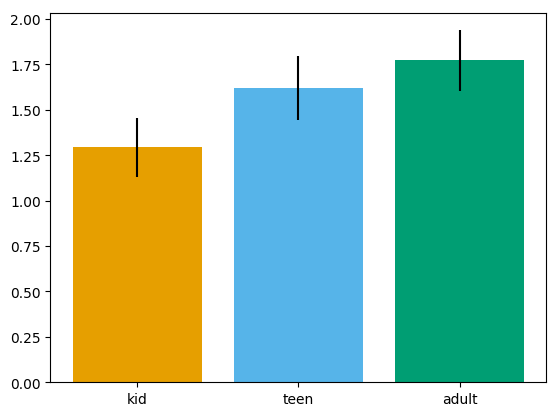

In [8]:
all_betas = all_betas.query("beta < 5 and beta > -5")
plot_df = all_betas.groupby(['age_group'], as_index=False).agg(
                      {'beta':['mean','sem']})
plot_df.columns = ["age_group", "mean", "sem"]
age_groups = ['kid', 'teen', 'adult']
mapping = {group: i for i, group in enumerate(age_groups)}
key = plot_df['age_group'].map(mapping)
plot_df=plot_df.iloc[key.argsort()]
plt.rcdefaults()
fig, ax = plt.subplots()
ax.bar(plot_df.age_group, plot_df["mean"], yerr=plot_df["sem"], align='center', color=[ "#E69F00","#56B4E9","#009E73"])


## Model 3: Task regressors for learners vs. non-learners

Learners: those who are more likely to make correct choices later in the task

Cluster corrected p-value maps for the t-test checking regions where relationship between task regressor and BOLD activity is stronger for learners compared to non-learners.

- Learners have larger activity in both but more so in the right frontal pole/middle frontal gyrus/inferiori frontal gyrus for positive EV machines compared to negative EV machines.

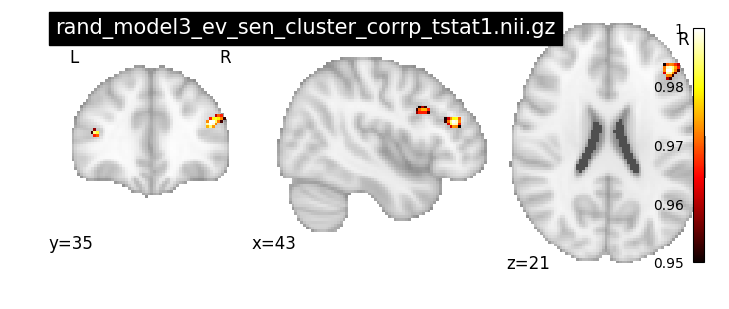

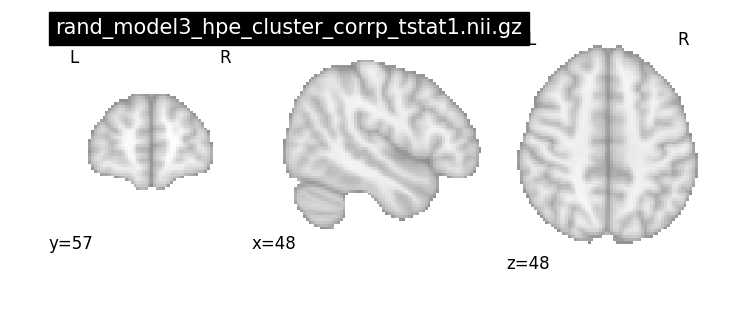

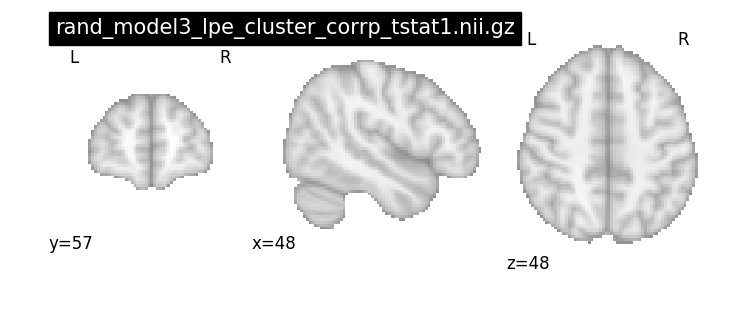

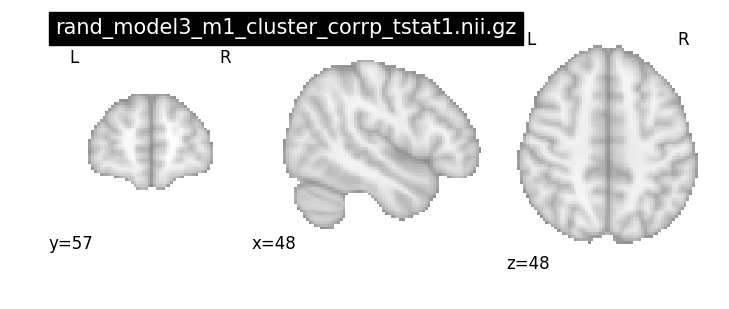

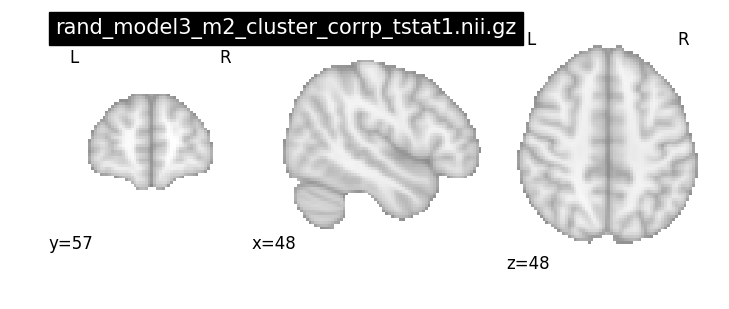

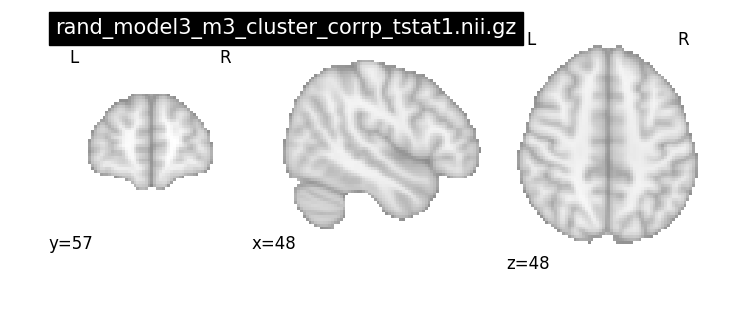

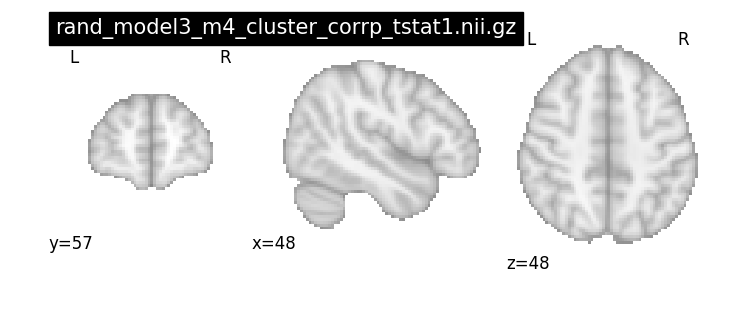

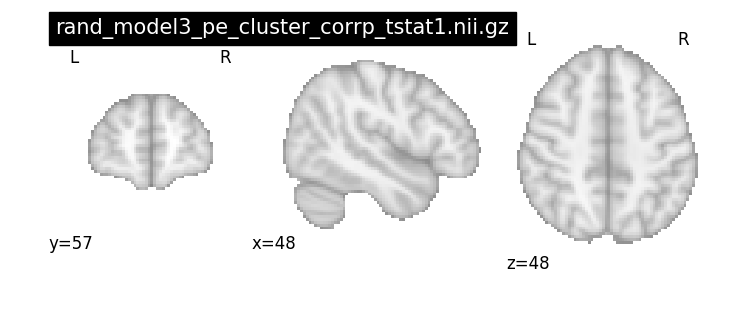

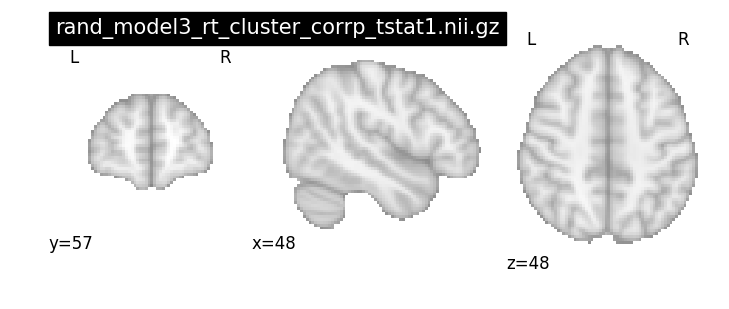

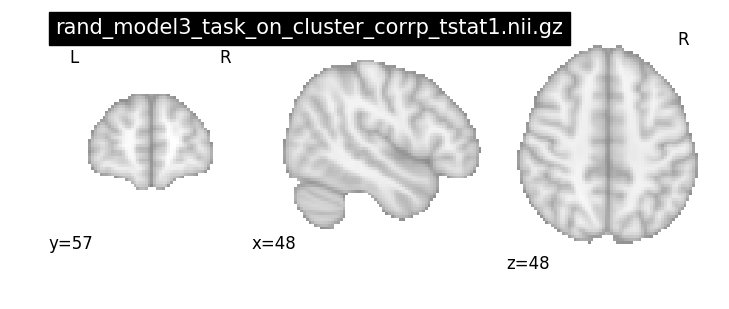

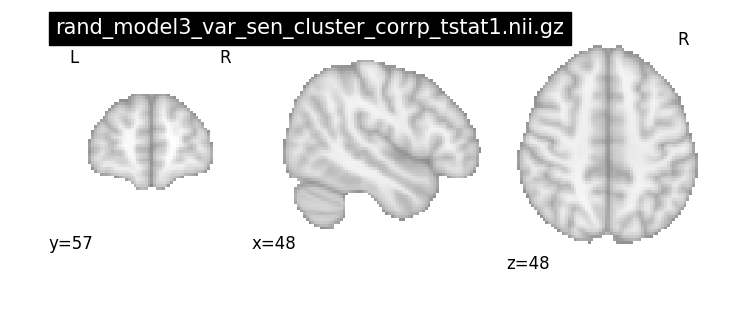

In [9]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model3/*/*tstat1*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

In a separate model I tried modeling each machine with respect to the predicted EVs from the RL fits. This didn't show anything except for a **larger EV related activity for learners compared to non-learners in acc/pcc** (see l3_ev_sanbox.ipynb).

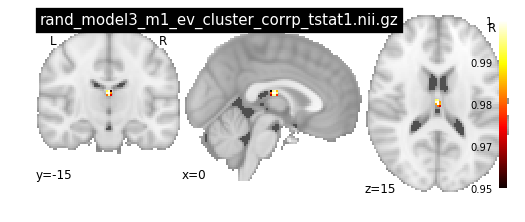

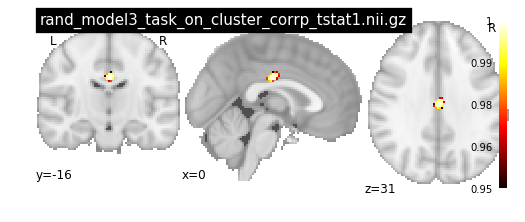

In [5]:
ip1 = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model3/m1_ev'
ip2 = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model3/task_on'
pos_t_corrected_p_paths = ["%s/rand_model3_m1_ev_cluster_corrp_tstat1.nii.gz"%(ip1), 
                           "%s/rand_model3_task_on_cluster_corrp_tstat1.nii.gz"%(ip2)] 
neg_t_corrected_p_paths = ["%s/rand_model3_neg_m1_ev_cluster_corrp_tstat1.nii.gz"%(ip1),
                           "%s/rand_model3_neg_task_on_cluster_corrp_tstat1.nii.gz"%(ip2)]

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

## Model 4: Change in task regressors for learners vs. non-learners

Interactive model checking effect of first vs. second half of task, learner vs. non-learner and the interaction of these two factors

### Main effect of first vs. second half

Randomise cluster corrected p values

Nothing survives whole brain correction

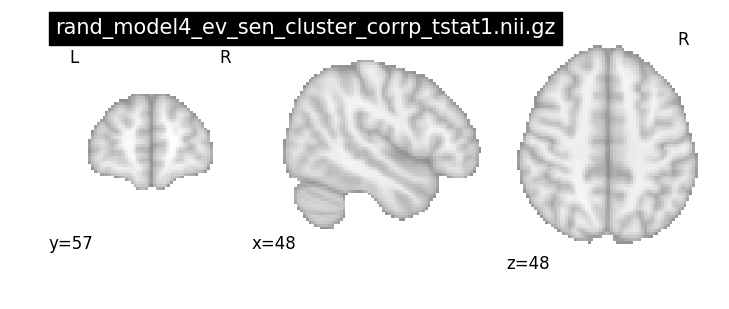

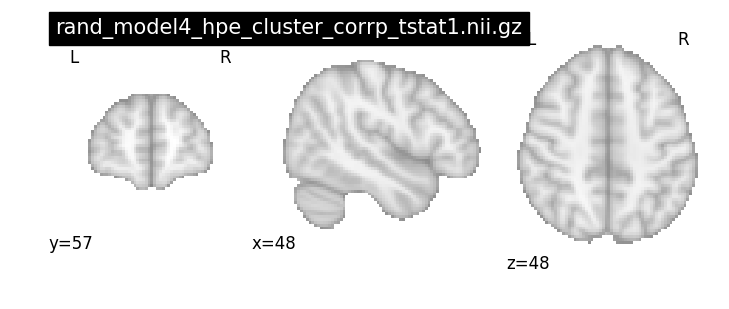

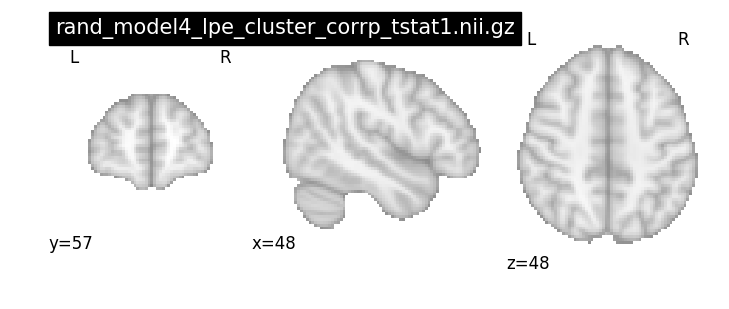

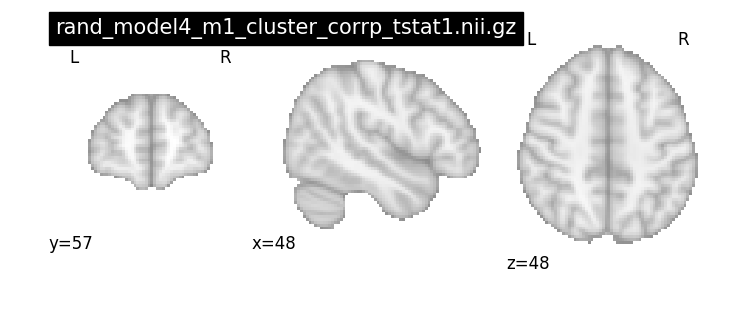

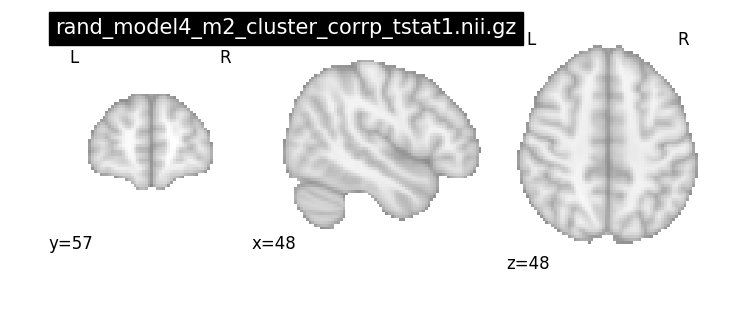

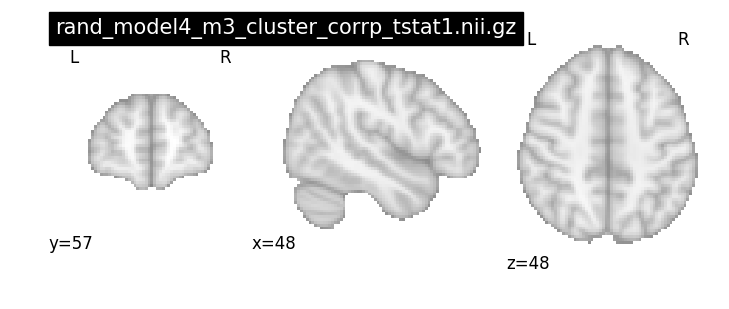

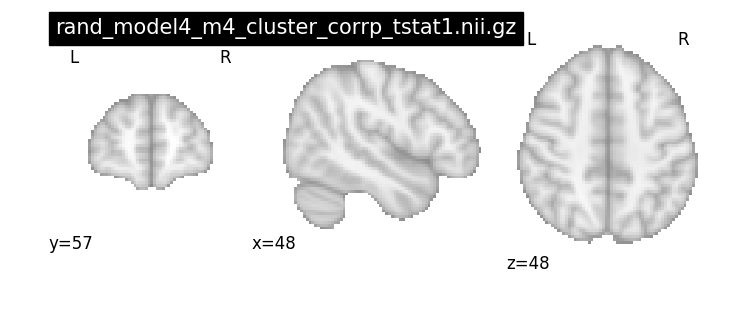

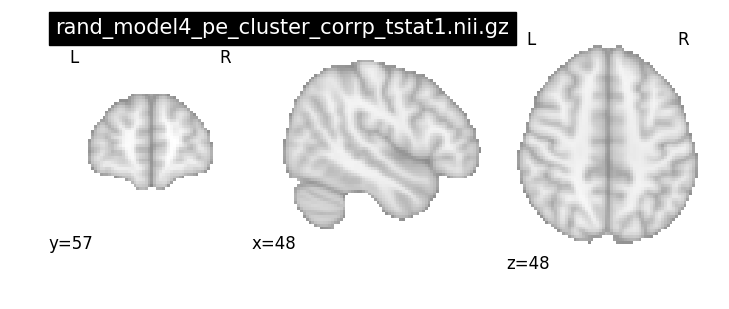

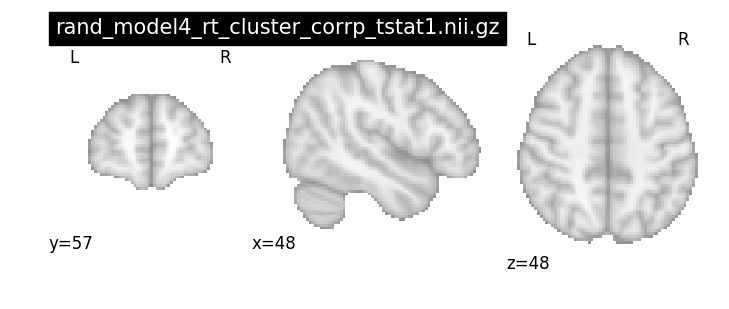

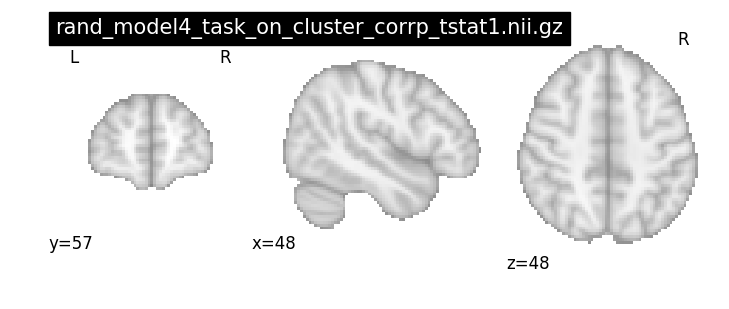

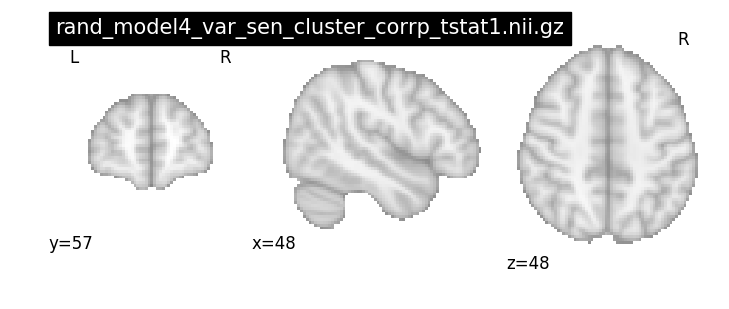

In [10]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model4/*/*corrp_tstat1*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)
    
    

### Main effect of learner vs. non-learner

Randomise corrected p values for the tmap

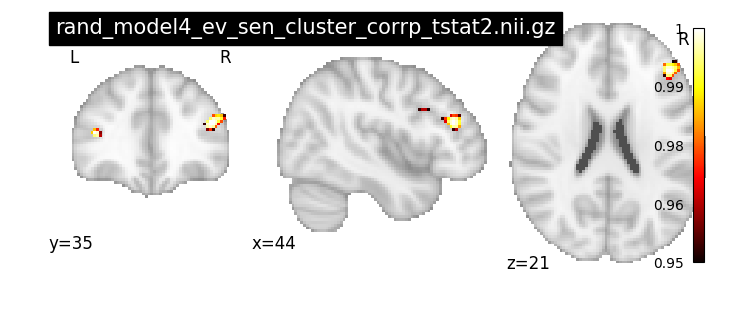

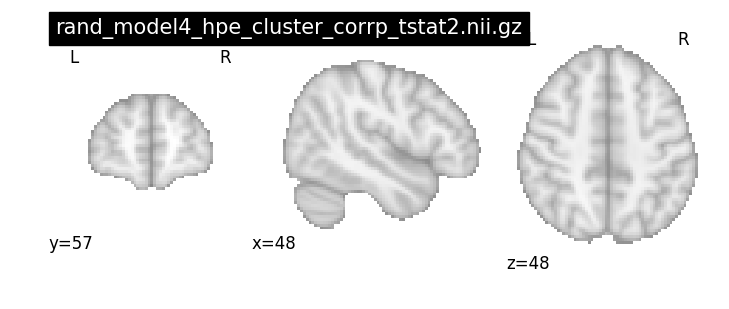

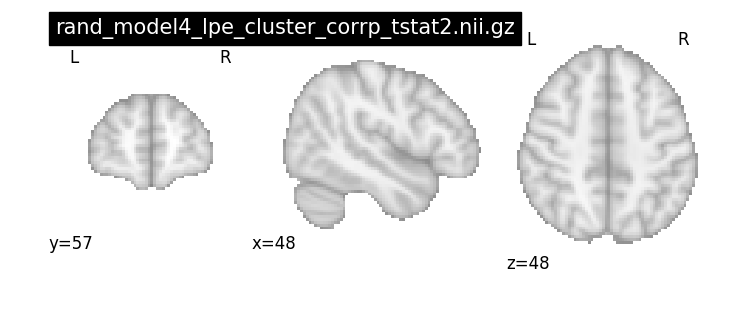

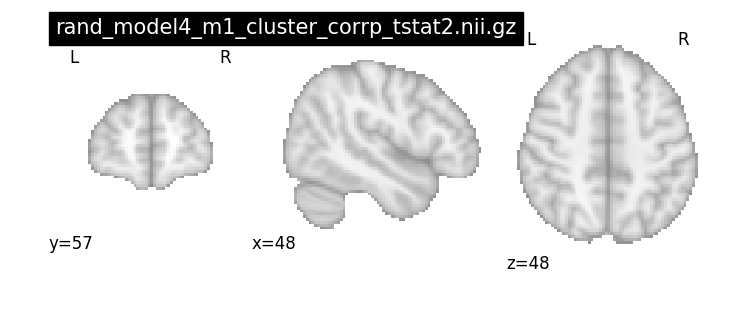

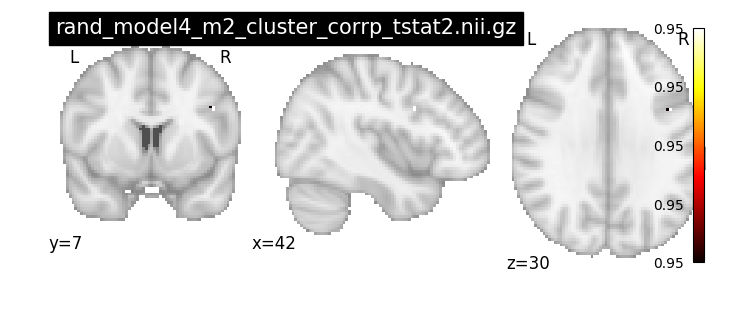

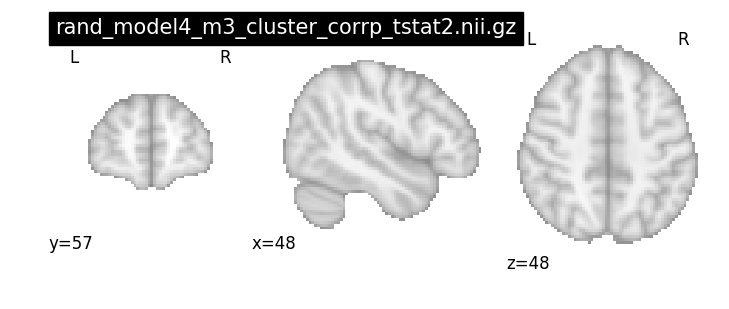

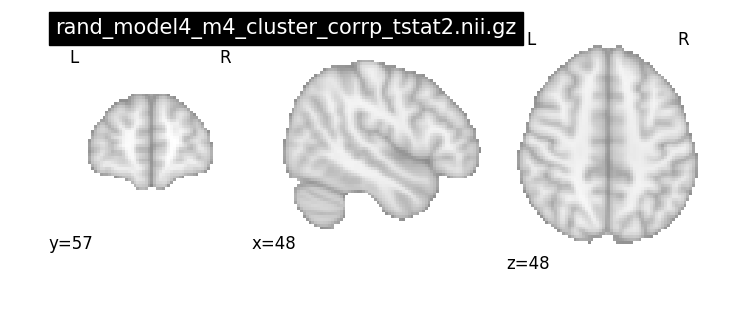

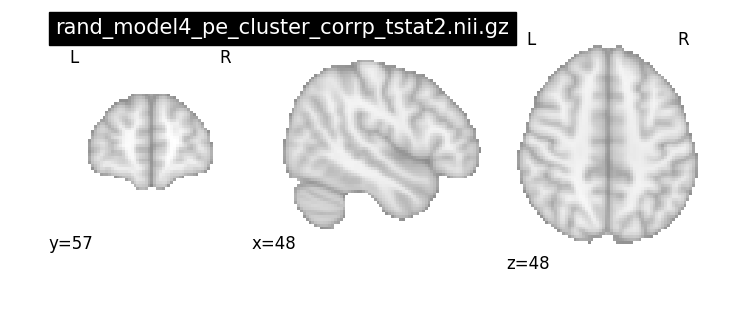

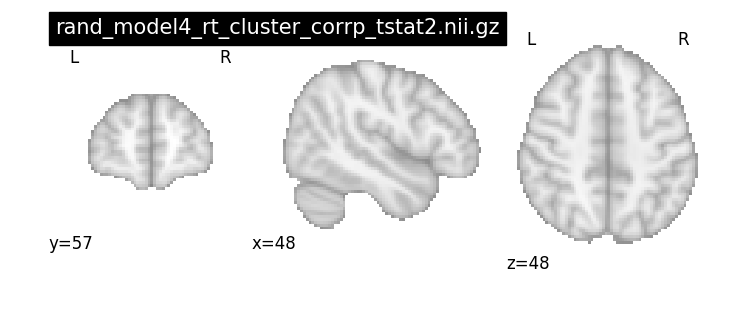

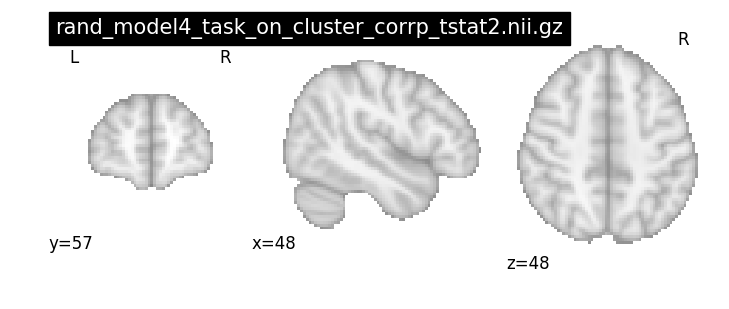

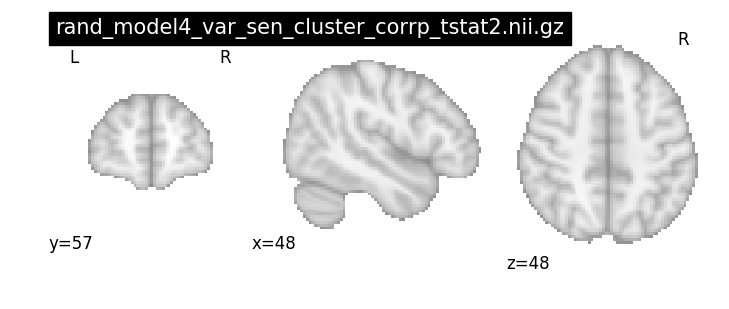

In [11]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model4/*/*corrp_tstat2*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)


When looking at differences between learners and non-learners we found that learners responded more strongly to pEV machines compared to nEV machines. We find this when accounting for the effect of halves as well. We find a difference in var_sen activity as well but this is below threshold for both groups.

In [12]:
warnings.filterwarnings("ignore", category=FutureWarning)
regs = ["ev_sen", "var_sen"]
coords = [[44,35,21], [-62,-12,-16]]
out = pd.DataFrame(columns=["reg", "learner", "non-learner"])

for i in range(0, len(regs)):
    in_path = "/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model3_g"
    reg = regs[i]
    learner_t_map = os.path.join(in_path, reg, "rand_model3_g_%s_tstat1_cluster.nii.gz"%(reg))
    non_learner_t_map = os.path.join(in_path, reg, "rand_model3_g_%s_tstat2_cluster.nii.gz"%(reg))

    mni = coords[i]
    T = nib.load(learner_t_map).affine
    learner_t = np.round(nib.load(learner_t_map).get_fdata()[mni2vox(mni, T)],2)
    T = nib.load(non_learner_t_map).affine
    non_learner_t = np.round(nib.load(non_learner_t_map).get_fdata()[mni2vox(mni, T)],2)

    out=out.append(pd.DataFrame(data = {"reg":[reg], "learner":[learner_t], "non-learner":[non_learner_t]}), ignore_index=True)
print("T values at peak voxels of group differences")
out

T values at peak voxels of group differences


,learner,non-learner,reg
0,6.17,-1.00,ev_sen
1,-1.92,-0.44,var_sen


### Interaction of first vs. second half with learner vs. non-learner

Randomise corrected p values for the tmap

No interaction between half and learner groups survives whole brain correction.

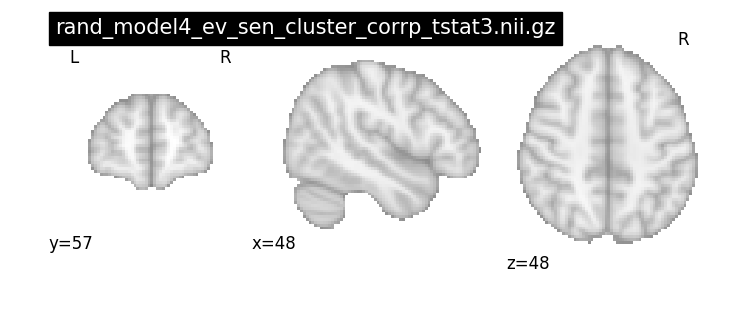

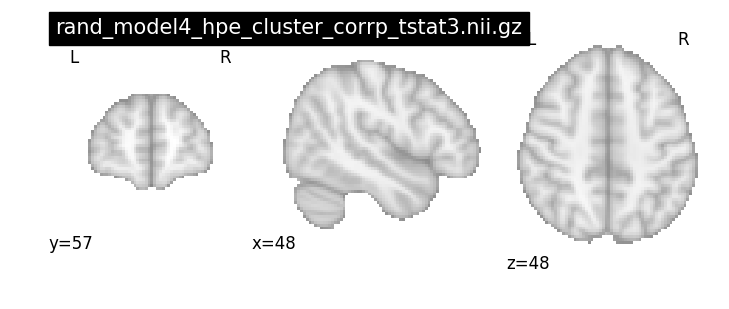

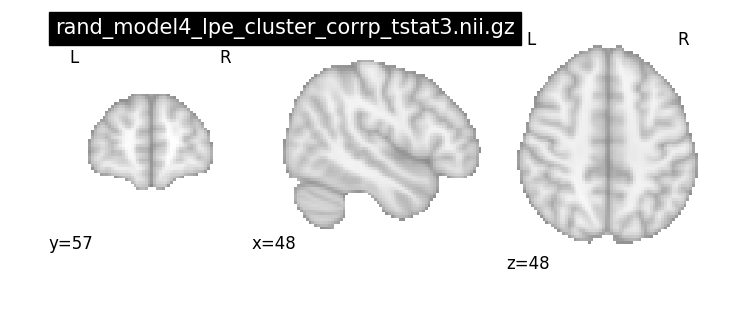

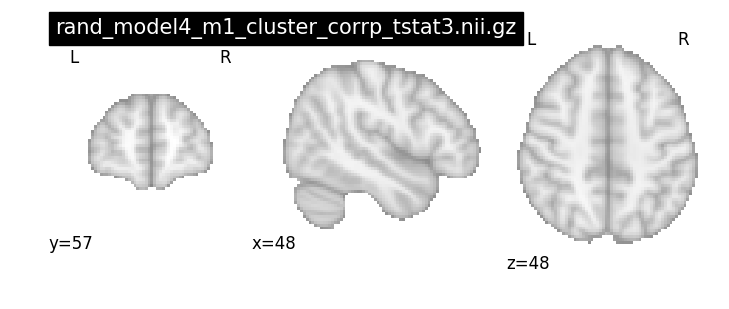

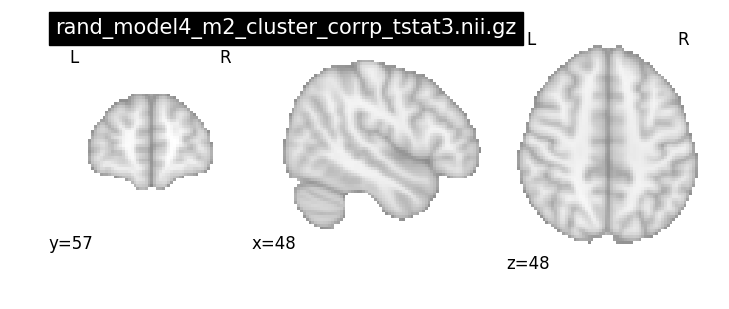

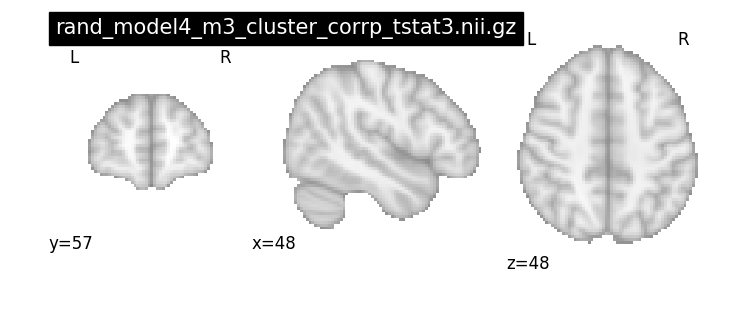

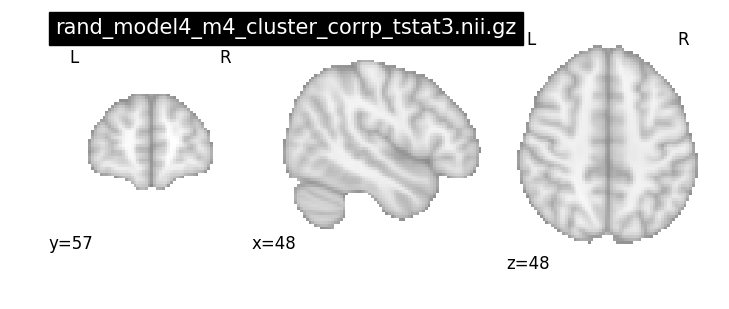

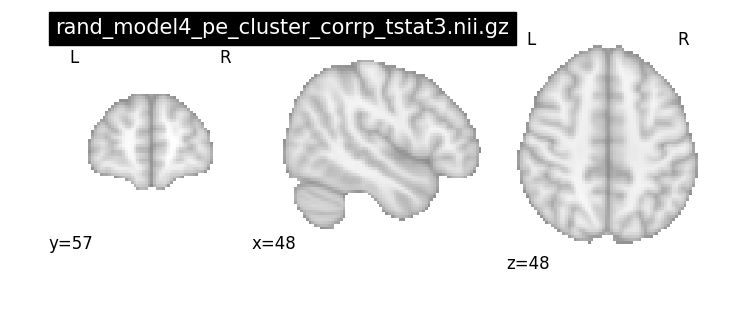

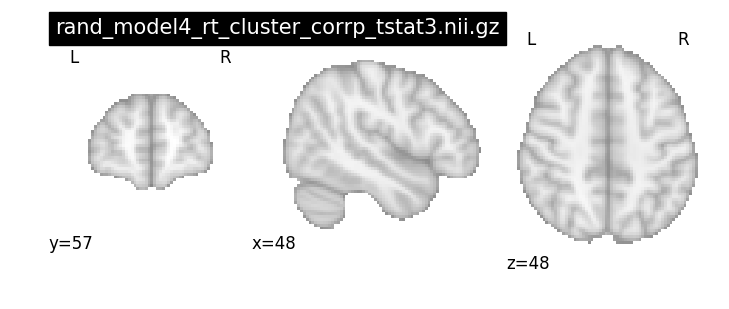

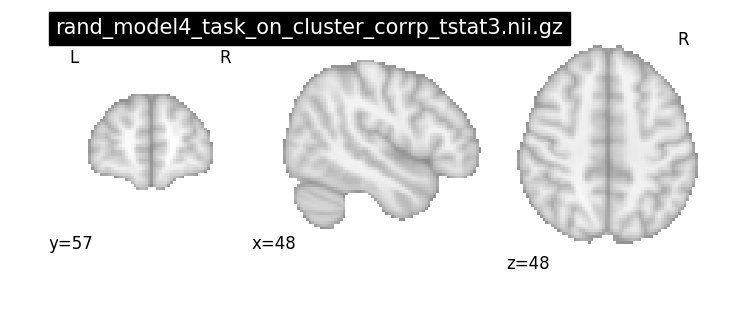

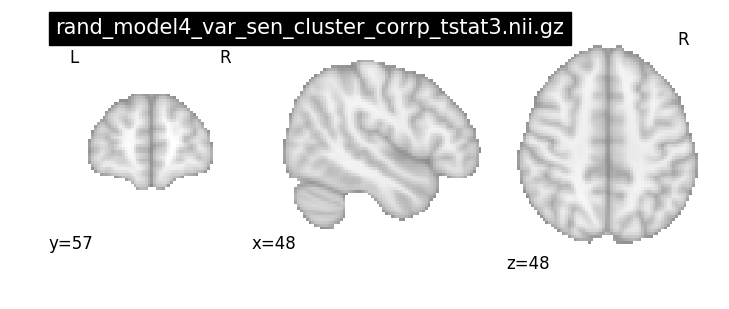

In [13]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model4/*/*corrp_tstat3*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)


## ROI analysis of the vStr for learners vs. non-learners

In [Schoenberg et al. (2007)](https://www.jneurosci.org/content/jneuro/27/47/12860.full.pdf) they do an ROI analysis of learners vs. non-learners comparing average parameter estimates for PE regressor from dorsal striatum (though based on [Table 3S](https://www-jneurosci-org.stanford.idm.oclc.org/content/jneuro/suppl/2007/11/21/27.47.12860.DC1/Supplemental_JN-RM-2496-07.R2.pdf) in their supplements they seem to refer to z-scores as 'parameter estimates').  

Inspired by this here we compare the average beta/z-score for learners vs. non-learners from several ROIs.

See details of this analysis [in a separate notebook](https://zenkavi.github.io/DevStudy_Analyses/output/reports/Roi_analyses.nb.html)

## Functional connectivity differences for learners vs. non-learners

### vStr-vmPFC

### Insula - vMPFC

# Figures to work on

Remember to check out https://github.com/nilearn/nilearn/issues/1464 for ideas on components of nilearn plots

To do:
- Have both images in one row and two columns
- Share a color bar
- Format titles to be different size, location and no black background

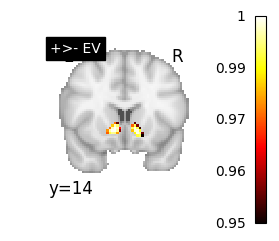

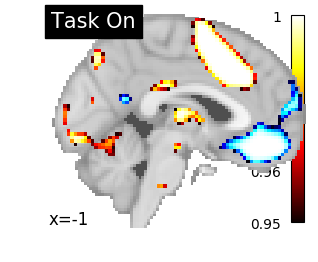

In [14]:
ev_sen_pos_path = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model1/ev_sen/rand_model1_ev_sen_cluster_corrp_tstat1.nii.gz'
ev_sen_neg_path = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model1/ev_sen/rand_model1_neg_ev_sen_cluster_corrp_tstat1.nii.gz'
fig_ev_sen = plotting.plot_stat_map(image.smooth_img(ev_sen_pos_path,5), colorbar=False, threshold=0.95, draw_cross=False, display_mode = 'y', cut_coords = [14])
fig_ev_sen.title("+>- EV", size=10)
fig_ev_sen.add_overlay(image.smooth_img(ev_sen_pos_path,5), threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
total_cols=10
box = fig_ev_sen._colorbar_ax.get_position()
fig_ev_sen._colorbar_ax.set_position([box.x0+(box.x0*0.1/total_cols), box.y0, box.width, box.height])
#fig_ev_sen.add_overlay(image.smooth_img(ev_sen_neg_path,5), threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

task_on_pos_path = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model1/task_on/rand_model1_task_on_cluster_corrp_tstat1.nii.gz'
task_on_neg_path = '/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model1/task_on/rand_model1_neg_task_on_cluster_corrp_tstat1.nii.gz'
fig_task_on = plotting.plot_stat_map(image.smooth_img(task_on_pos_path,5), colorbar=False, title="Task On", threshold=0.95, draw_cross=False, display_mode = 'x', cut_coords = [-1])
fig_task_on.add_overlay(image.smooth_img(task_on_pos_path,5), threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
fig_task_on.add_overlay(image.smooth_img(task_on_neg_path,5), threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

To do:
- Add colorbar to indicate age groups

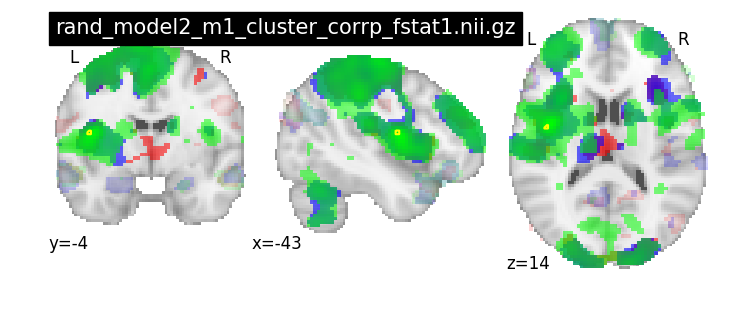

In [15]:
in_path = "/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3/model2"
reg = "m1"
f_corrected_p_path = os.path.join(in_path, reg, "rand_model2_m1_cluster_corrp_fstat1.nii.gz")
kid_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat1_cluster.nii.gz")
teen_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat2_cluster.nii.gz")
adult_t_map = os.path.join(in_path, reg, "rand_model2_m1_tstat3_cluster.nii.gz")

fig = plotting.plot_stat_map(f_corrected_p_path, colorbar=False, title=os.path.basename(f_corrected_p_path), threshold=0.95, draw_cross=False)
fig.add_contours(f_corrected_p_path, levels=[0.95], colors='yellow')
fig.add_overlay(kid_t_map, threshold=3, cmap=plotting.cm.red_transparent_full_alpha_range, colorbar=False)
fig.add_overlay(teen_t_map, threshold=3, cmap=plotting.cm.blue_transparent_full_alpha_range, colorbar=False)
fig.add_overlay(adult_t_map, threshold=3, cmap=plotting.cm.green_transparent_full_alpha_range, colorbar=False)
